### random sample imputation
aim: Random sample imputation consists of taking random observations from the dataset and we use this observation to replace nan values
when it should be used ?
it assumes that the data are completely at random(MCAR)

In [2]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum() #by .sum() we can get the null values where they are present

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()  #to get the percentage

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
df['Age'].isnull().sum()

177

In [16]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) #.sample() picks any sample values
#here all the NAN values are replaced bye random values bye using sample(df['Age'].isnull().sum())
#the values will change always by executing so to avoid that random_state=0 is used

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
df[df['Age'].isnull()].index  #it will give us the index of the NAN values

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [22]:
#now we will raplace NAN values with Random Sample and we should also compare this with mean,median mode
#we should also create variable_random 
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #it will have the ramdon value to fill the NA
    #and we should replace the random_sample to df[variable+"_random"] to do this the index of NAN should be same 
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) #now we replace the age with variable
    #we will take this as random sample value
    ##pandas needs to have same index in order to merge the datadet
    random_sample.index=df[df[variable].isnull()].index #give us the index of the NAN values
    #wherever it is null with lock operation with this particular feature(variable+'_random') replace with random_sample
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [20]:
median=df['Age'].median()

In [21]:
median

28.0

In [23]:
impute_nan(df,"Age",median)

In [24]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

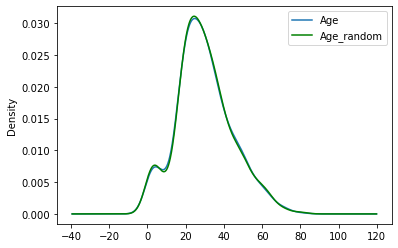

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax) #ax is the axis
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
#no distortion in this graph

# Advantages
1.easy to implement
2.there is less distortion in variance

# Disadvantage
1.in every situation randomness wont work

# Capturing NAN values with a new Feature
it works well if the data is not missing completely at random

In [27]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
#create a new feature(Age_NAN) where ever the NAN values are present replace it by 1 else 0
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [30]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [31]:
df.Age.median()

28.0

In [33]:
#we should replace median  at NAN values
df['Age'].fillna(df.Age.median(),inplace=True)

In [36]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# Advantages

1. Easy to implement
2.captures the importance of the missing values

# Disadvantages

1.Creating Additional Feature (leads to curse in dimensionality) #if we have 10 feature containing NAN values 10 more features will be created

# End of distribution Imputation

In [37]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

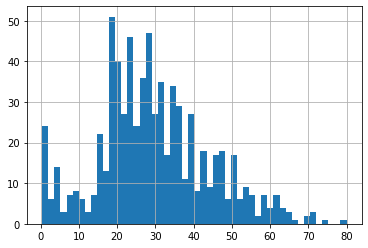

In [39]:
df.Age.hist(bins=50) #we should take far end distribution of the below graph
#and replace it in NaN
#we should pick up the right end distribution of data

In [50]:
extreme=df.Age.mean()+3*df.Age.std() #this means the value of the 3rd standard diviation in normal distriburion is the end distribution

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

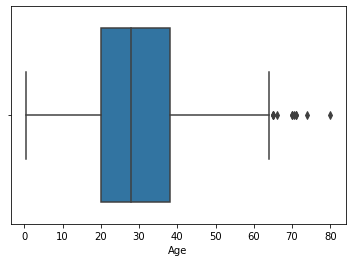

In [51]:
#to check the outliers
import seaborn as sns
sns.boxplot('Age',data=df)
#why we dont have left side out lier?
#because in our data we dont have outside outlier

In [52]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme) #Age_end_distribution will be fill with extreme where the NAN values are present
    df[variable].fillna(median,inplace=True) #age will be replaced with median where the NAN values are present


In [53]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [57]:
df.head(10) #age will be replaced with median 
#Age_end_distribution will be fill with extreme where the NAN values are present

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [55]:
median=df.Age.median()

In [56]:
median

28.0

<AxesSubplot:>

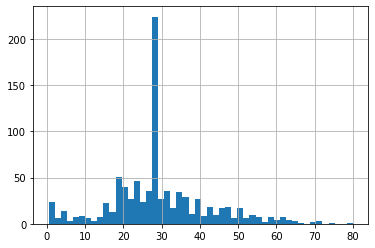

In [58]:
df.Age.hist(bins=50) #this gives us the normal distribution

<AxesSubplot:>

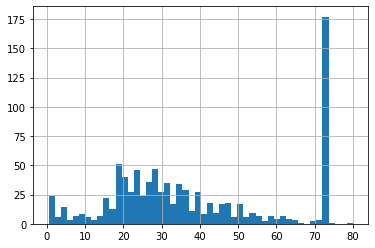

In [59]:
df.Age_end_distribution.hist(bins=50) #the outliers are caapturd by using end of distribution

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

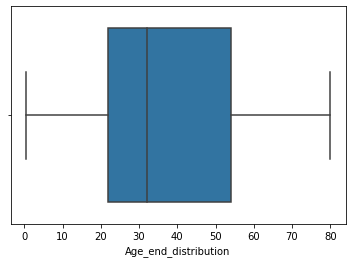

In [60]:
sns.boxplot('Age_end_distribution',data=df) #now we wont get any outliers

In [63]:
df.Age.hist(bins=50, kind='kde')

AttributeError: 'Series' object has no attribute 'sns'

<AxesSubplot:xlabel='Age_end_distribution', ylabel='Density'>

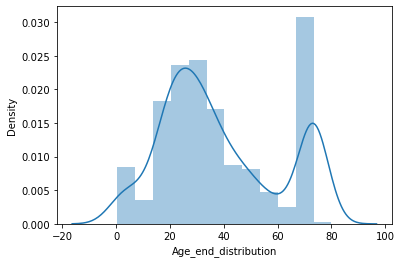

In [65]:
sns.distplot(df['Age_end_distribution'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

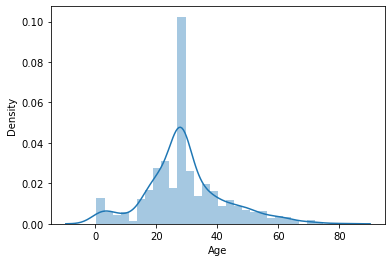

In [66]:
sns.distplot(df['Age'])